In [231]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage.util import random_noise

In [232]:
img= cv2.imread(r"R:\a irwansight\data-augmentasi\foto1.jpg")
img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

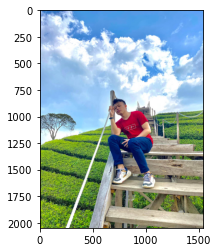

In [233]:
plt.imshow(img)
plt.show()

In [234]:
height, width, dims= img.shape
print(height, width, dims)

2048 1536 3


In [235]:
gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray.shape)

(2048, 1536)


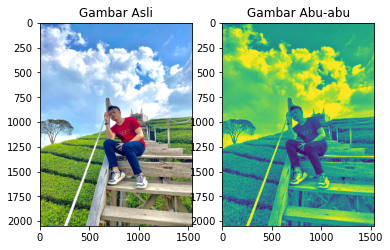

In [236]:
plt.subplot(121)
plt.imshow(img)
plt.title("Gambar Asli")
plt.subplot(122)
plt.imshow(gray)
plt.title("Gambar Abu-abu")
plt.show()

In [237]:
img= cv2.resize(img,(700,700))
img.shape

(700, 700, 3)

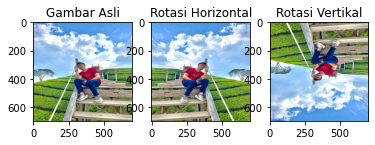

In [238]:
plt.subplot(131) 
plt.title("Gambar Asli") 
plt.imshow(img)

hflipped_image= np.fliplr(img) #fliplr reverse the order of columns of pixels in matrix
plt.subplot(132) 
plt.title("Rotasi Horizontal")
plt.imshow(hflipped_image)

vflipped_image= np.flipud(img) #flipud reverse the order of rows of pixels in matrix
plt.subplot(133)
plt.title("Rotasi Vertikal")
plt.imshow(vflipped_image)
plt.show()

In [239]:
r_image = rotate(img, angle=45)  
r_image1 = rotate(img, angle=-45) 

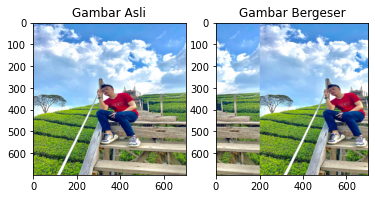

In [240]:
transform = AffineTransform(translation=(-200,0))  # (-200,0) are x and y coordinate, change it see the effect
warp_image = warp(img,transform, mode="wrap") #mode parameter is optional
# mode= {'constant', 'edge', 'symmetric', 'reflect', 'wrap'}
#these are possible values of mode, you can try them and decide which one to use, default value for mode is constant
plt.subplot(1,2,1)
plt.title('Gambar Asli')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Gambar Bergeser')
plt.imshow(warp_image)

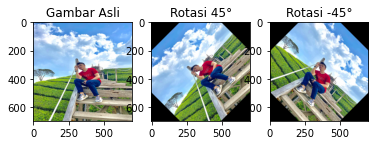

In [241]:
plt.subplot(131)
plt.imshow(img)
plt.title("Gambar Asli")
plt.subplot(132)
plt.imshow(r_image)
plt.title("Rotasi 45°")
plt.subplot(133)
plt.imshow(r_image1)
plt.title("Rotasi -45°")
plt.show()

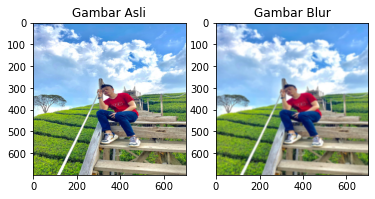

In [242]:
blur_image= cv2.GaussianBlur(img, (11,11),0)
plt.subplot(1,2,1)
plt.title('Gambar Asli')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Gambar Blur')
plt.imshow(blur_image)

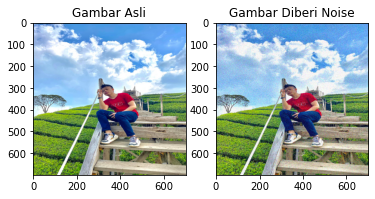

In [243]:
noisy_image= random_noise(img)
plt.subplot(1,2,1)
plt.title('Gambar Asli')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Gambar Diberi Noise')
plt.imshow(noisy_image)

In [244]:
#Lets define functions for each operation
def anticlockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, -angle)

def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

def add_noise(image):
    return random_noise(image)

def blur_image(image):
    return cv2.GaussianBlur(img, (9,9),0)

#I would not recommend warp_shifting, because it distorts image, but can be used in many use case like 
#classifying blur and non-blur images
def warp_shift(image): 
    transform = AffineTransform(translation=(0,40))  #chose x,y values according to your convinience
    warp_image = warp(image, transform, mode="wrap")
    return warp_image

In [245]:
transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip,
                   'wrap shift': warp_shift,
                   'adding noise': add_noise,
                   'blurring image':blur_image
                 }                #use dictionary to store names of functions 

images_path="C:/Users/Anggrek Lina/Image_Collection" #path to original images
augmented_path="C:/Users/Anggrek Lina\Aumented_Images" # path to store aumented images
images=[] # to store paths of images from folder

for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

images_to_generate=1000  #you can change this value according to your requirement
i=1                        # variable to iterate till images_to_generate

while i<=images_to_generate:    
    image=random.choice(images)
    original_image = io.imread(image)
    transformed_image=None
#     print(i)
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1
#to generate more images, put above 3 statement inside while n<... loop

IndexError: Cannot choose from an empty sequence

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('foto1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()